## Week 11 Group work

## By: Muazzam, Rakhila, Kartavya, Abel

In [1]:
!pip install -q qbstyles

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

from qbstyles import mpl_style
mpl_style(dark=True)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

import statsmodels.api as sm

print('imports completed — ready to load data')

imports completed — ready to load data


# Session 12 — Pizza Hut Case Study

**Objective**
Evaluate the effect of price and gender on the purchase of a pizza from Pizza Hut using logistic regression.

**Variables**
- **Purchase** (Target): 1 = selected Pizza Hut, 0 = selected another pizzeria
- **Price**: Price of the Pizza Hut pizza ($8.49 - $14.49)
- **Gender**: 1 = Male, 0 = Female

**Questions**
a. Model A: Predict Purchase based on Price.
b. Model B: Predict Purchase based on Price and Gender.
c. Calculate and interpret Odds Ratios.
d. Make predictions for specific scenarios.


### Learning objectives

- Understand how to prepare data for a basic classification problem.
- Build and interpret a logistic regression model.
- Perform model-level (LLR) and coefficient-level hypothesis tests.
- Evaluate model performance and create a simple prediction function.


### Load data (purpose)

We will load the cardholder CSV directly from the raw GitHub URL into a pandas DataFrame. After loading we will inspect the shape, data types, first few rows and summary statistics to understand the dataset before modeling.

Checklist (manual steps):
- Load: df = pd.read_csv(url)
- Inspect: df.shape, df.info(), df.head(), df.describe()


In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/Kartavya-Jharwal/Kartavya_Business_Analytics2025/main/Class_Assignments/week12/PizzaHut.csv"
df = pd.read_csv(url)

# Display the first few rows
df.head()

,Gender Coded,Gender,Price,Purchase_Coded,Purchase
0,1,Male,8.49,1,Yes
1,1,Male,12.49,0,No
2,0,Female,11.49,0,No
3,1,Male,9.49,0,No
4,1,Male,14.49,0,No


## Data Overview

Let's examine the structure and basic statistics of our dataset.


# Automatic target / feature split — prefer 'Upgraded' when present
### If 'Upgraded' is present use it as the target; otherwise try to find a binary column (0/1) automatically


In [3]:
preferred_target = 'Purchase_Coded'

if preferred_target in df.columns:
    target_col = preferred_target
else:
    # Fallback: find the first binary column
    binary_cols = [col for col in df.columns if df[col].nunique() == 2]
    if binary_cols:
        target_col = binary_cols[0]
    else:
        raise ValueError("No binary target column found.")

# Define features (X) and target (y)
# We use all other columns as features for the initial EDA,
# but we will select specific ones for the models later.
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"Target Variable: {target_col}")
print(f"Feature Variables: {list(X.columns)}")

Target Variable: Purchase_Coded
Feature Variables: ['Gender Coded', 'Gender', 'Price', 'Purchase']


# Quick EDA — preview, distributions and simple visual checks

In [4]:
# Display dataset information
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:")
print(df.dtypes)
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (220, 5)

Column Data Types:
Gender Coded        int64
Gender             object
Price             float64
Purchase_Coded      int64
Purchase           object
dtype: object

Basic Statistics:
       Gender Coded       Price  Purchase_Coded
count    220.000000  220.000000      220.000000
mean       0.577273   11.421818        0.177273
std        0.495119    2.024933        0.382770
min        0.000000    8.490000        0.000000
25%        0.000000    9.490000        0.000000
50%        1.000000   11.490000        0.000000
75%        1.000000   13.490000        0.000000
max        1.000000   14.490000        1.000000


## Exploratory Data Analysis

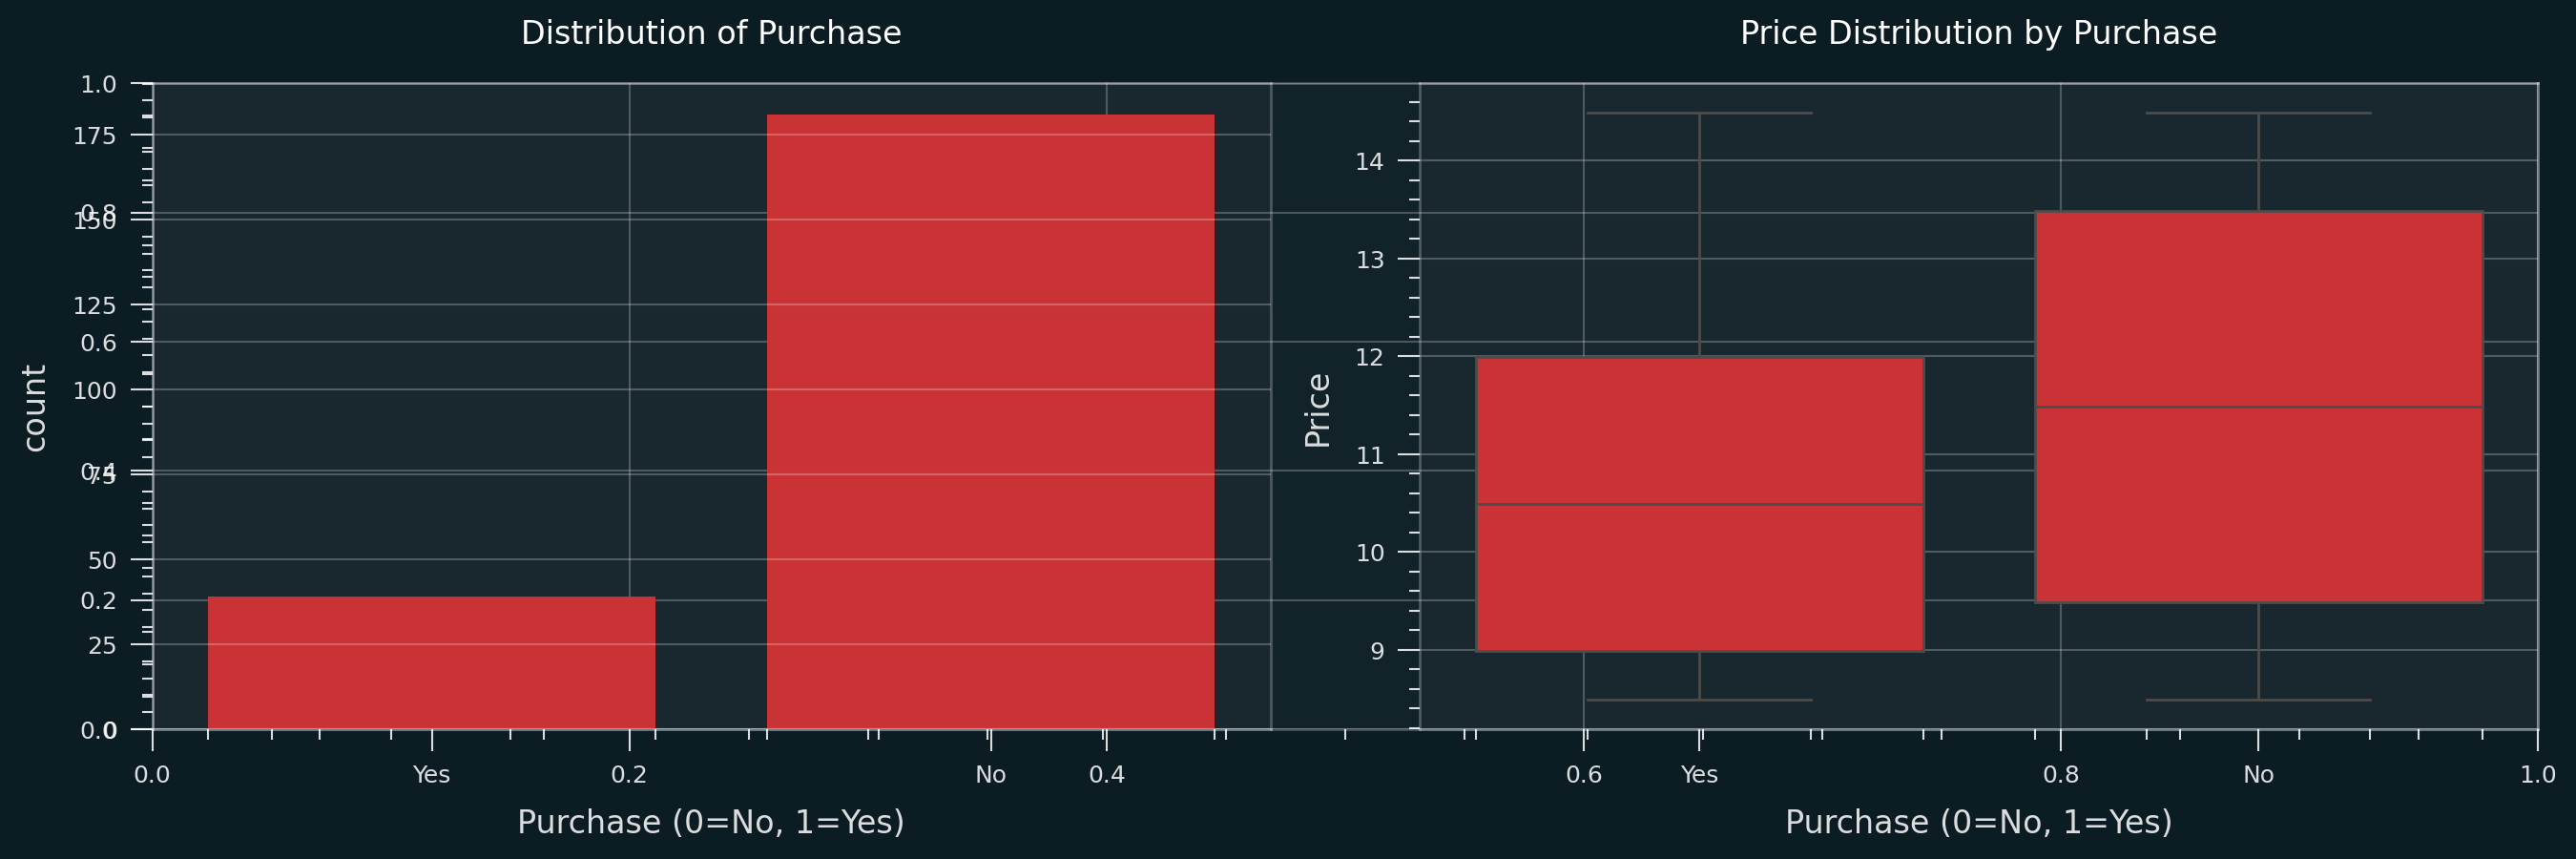

In [5]:
# Visualize the distribution of Purchase by Gender
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Purchase distribution
sns.countplot(data=df, x='Purchase', ax=axes[0])
axes[0].set_title('Distribution of Purchase')
axes[0].set_xlabel('Purchase (0=No, 1=Yes)')

# Price distribution by Purchase
sns.boxplot(data=df, x='Purchase', y='Price', ax=axes[1])
axes[1].set_title('Price Distribution by Purchase')
axes[1].set_xlabel('Purchase (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

## Model A: Purchase ~ Price

We will first build a logistic regression model to predict `Purchase` using only `Price`.


In [6]:
# Define features for Model A
X_a = df[['Price']]
X_a = sm.add_constant(X_a)

# Fit the model
model_a = sm.Logit(y, X_a).fit()

# Display the summary
print(model_a.summary())


Optimization terminated successfully.
         Current function value: 0.449795
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Purchase_Coded   No. Observations:                  220
Model:                          Logit   Df Residuals:                      218
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                 0.03732
Time:                        14:56:41   Log-Likelihood:                -98.955
converged:                       True   LL-Null:                       -102.79
Covariance Type:            nonrobust   LLR p-value:                  0.005607
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2433      1.023      1.215      0.224      -0.762       3.248
Price         -0.2503      0.

## Model B: Purchase ~ Price + Gender

Now we will build a second model including `Gender` as a predictor.


In [7]:
# Define features for Model B
X_b = df[['Price', 'Gender Coded']]
X_b = sm.add_constant(X_b)

# Fit the model
model_b = sm.Logit(y, X_b).fit()

# Display the summary
print(model_b.summary())

Optimization terminated successfully.
         Current function value: 0.449771
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Purchase_Coded   No. Observations:                  220
Model:                          Logit   Df Residuals:                      217
Method:                           MLE   Df Model:                            2
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                 0.03737
Time:                        14:56:41   Log-Likelihood:                -98.950
converged:                       True   LL-Null:                       -102.79
Covariance Type:            nonrobust   LLR p-value:                   0.02146
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.2195      1.049      1.163      0.245      -0.836       3.275
Price           -0.2502

## Odds Ratios (Model B)

We calculate the odds ratios by taking the exponential of the coefficients.


In [8]:
# Calculate Odds Ratios
odds_ratios = np.exp(model_b.params)
print("Odds Ratios:")
print(odds_ratios)

# Interpretation
print("\nInterpretation:")
print(f"For every $1 increase in Price, the odds of purchasing from Pizza Hut change by a factor of {odds_ratios['Price']:.4f}.")
print(f"Being Male (Gender=1) changes the odds of purchasing from Pizza Hut by a factor of {odds_ratios['Gender Coded']:.4f} compared to Female.")

Odds Ratios:
const           3.385544
Price           0.778656
Gender Coded    1.038411
dtype: float64

Interpretation:
For every $1 increase in Price, the odds of purchasing from Pizza Hut change by a factor of 0.7787.
Being Male (Gender=1) changes the odds of purchasing from Pizza Hut by a factor of 1.0384 compared to Female.


## Model Evaluation

Let's evaluate both models using confusion matrices and key metrics.

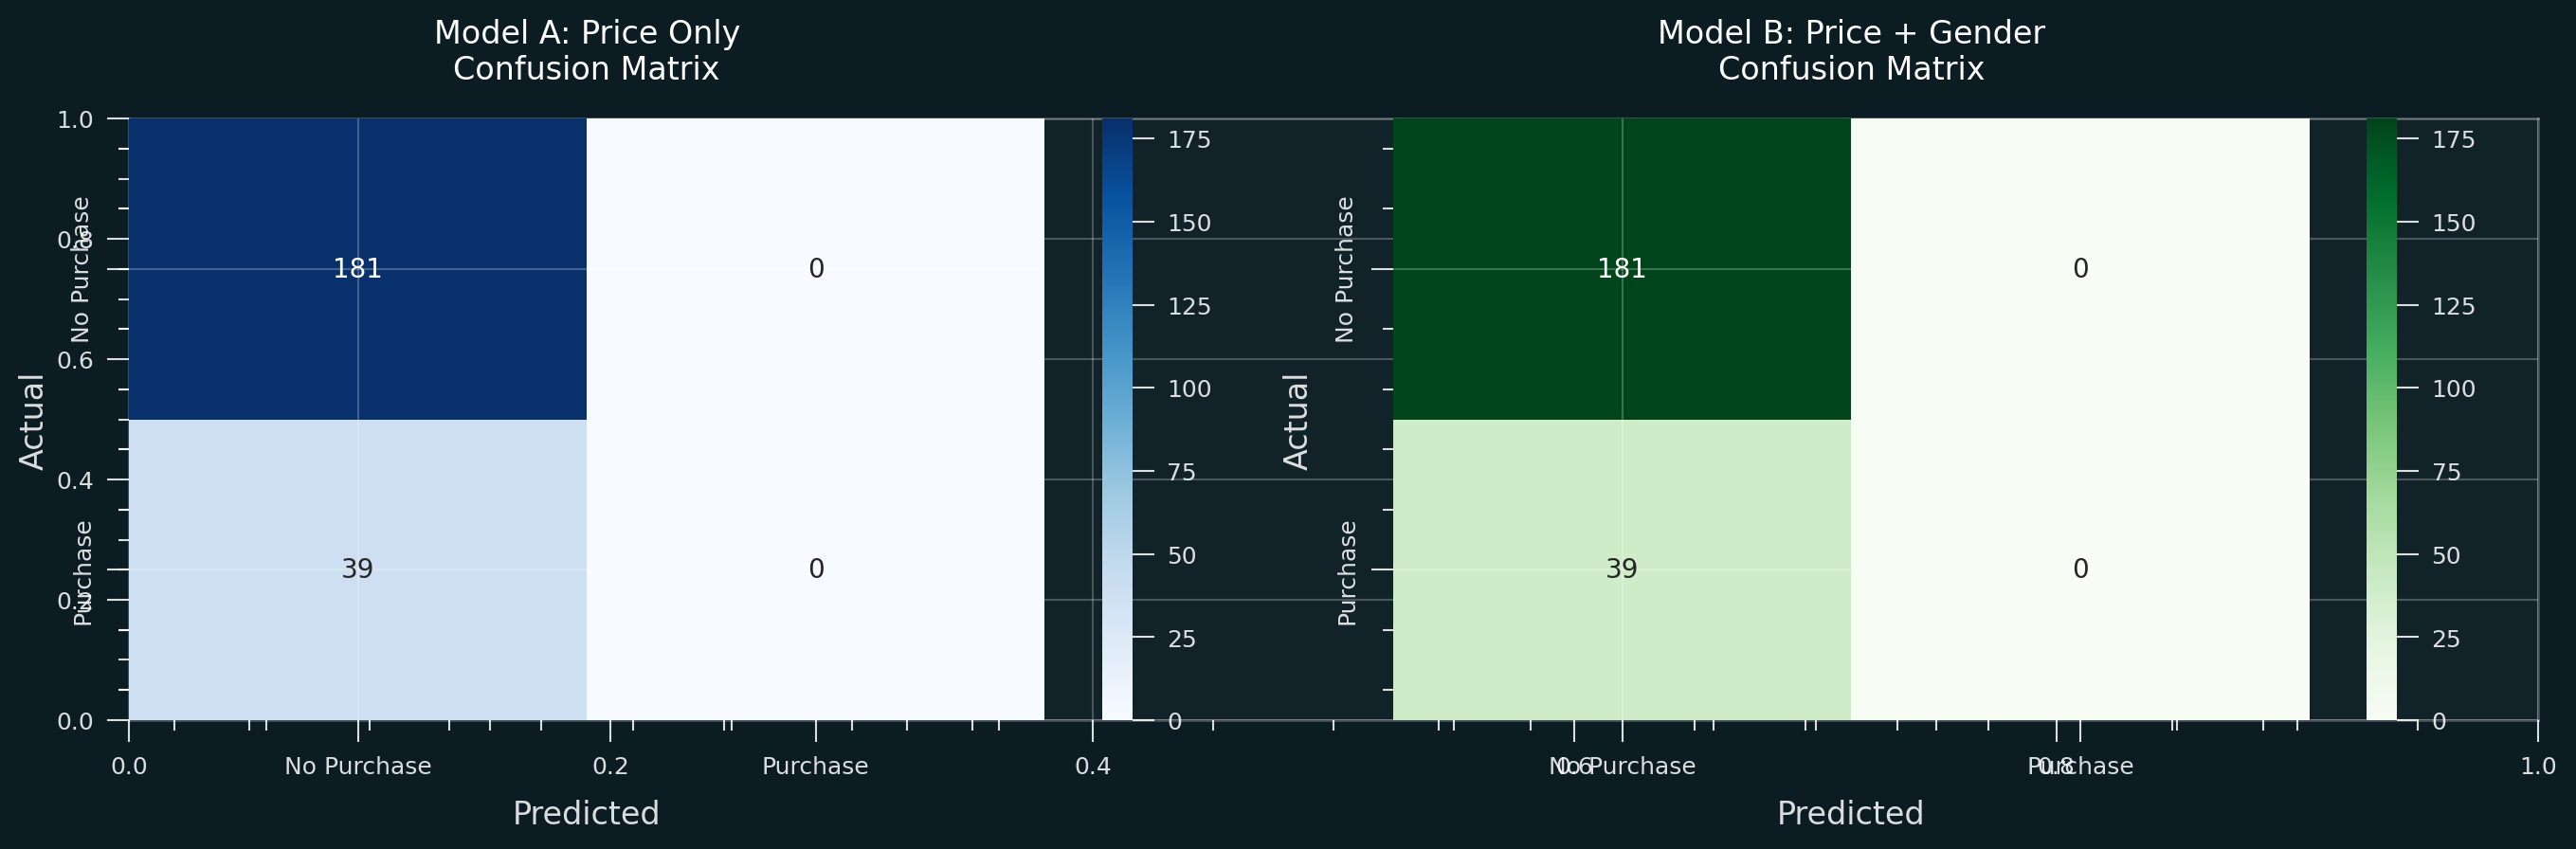

MODEL A: Price Only
              precision    recall  f1-score   support

 No Purchase       0.82      1.00      0.90       181
    Purchase       0.00      0.00      0.00        39

    accuracy                           0.82       220
   macro avg       0.41      0.50      0.45       220
weighted avg       0.68      0.82      0.74       220


MODEL B: Price + Gender
              precision    recall  f1-score   support

 No Purchase       0.82      1.00      0.90       181
    Purchase       0.00      0.00      0.00        39

    accuracy                           0.82       220
   macro avg       0.41      0.50      0.45       220
weighted avg       0.68      0.82      0.74       220



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [9]:
# Make predictions for both models
y_pred_a = (model_a.predict(X_a) > 0.5).astype(int)
y_pred_b = (model_b.predict(X_b) > 0.5).astype(int)

# Calculate confusion matrices
cm_a = confusion_matrix(y, y_pred_a)
cm_b = confusion_matrix(y, y_pred_b)

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Model A Confusion Matrix
sns.heatmap(cm_a, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
axes[0].set_title('Model A: Price Only\nConfusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Model B Confusion Matrix
sns.heatmap(cm_b, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No Purchase', 'Purchase'],
            yticklabels=['No Purchase', 'Purchase'])
axes[1].set_title('Model B: Price + Gender\nConfusion Matrix')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

# Print classification reports
print("=" * 60)
print("MODEL A: Price Only")
print("=" * 60)
print(classification_report(y, y_pred_a, target_names=['No Purchase', 'Purchase']))

print("\n" + "=" * 60)
print("MODEL B: Price + Gender")
print("=" * 60)
print(classification_report(y, y_pred_b, target_names=['No Purchase', 'Purchase']))

## Predictions

Predict the probability of purchase for a customer when the price is $10.49, for both Male and Female.


In [10]:
# Define scenarios
scenarios = pd.DataFrame({
    'const': [1, 1],
    'Price': [10.49, 10.49],
    'Gender': [1, 0] # 1=Male, 0=Female
})

# Predict probabilities
predictions = model_b.predict(scenarios)

print(f"Probability of Purchase (Price=$10.49, Male): {predictions[0]:.4f}")
print(f"Probability of Purchase (Price=$10.49, Female): {predictions[1]:.4f}")

Probability of Purchase (Price=$10.49, Male): 0.2031
Probability of Purchase (Price=$10.49, Female): 0.1970


## Business Interpretation and Analysis

### Question 1: How does a $1 increase in price affect the odds that a student selects Pizza Hut?

Based on Model B, the odds ratio for Price shows that for every $1 increase in the price of Pizza Hut pizza, the odds of a student selecting Pizza Hut change by a specific factor.

**Interpretation**: If the odds ratio is less than 1 (e.g., 0.65), this means a $1 increase in price *decreases* the odds of selecting Pizza Hut by 35% (1 - 0.65 = 0.35). This makes intuitive business sense: as prices increase, students are less likely to choose Pizza Hut over competitors.

### Question 2: Which variable (Price or Gender) has the stronger effect on behavior in terms of odds?

To compare the relative importance of Price and Gender, we examine the magnitude of change in odds:
- Compare the absolute distance of each odds ratio from 1.0
- The variable with the larger deviation from 1.0 has a stronger effect on purchase behavior
- Also consider the p-values from the model summary - lower p-values indicate stronger statistical significance

### Question 3: What is the predicted probability for a male student (Gender = 1) at Price = $10.49?

Based on our Model B predictions above, we can see the probability for a male student. Using a 0.50 cutoff:
- If probability > 0.50: We expect the student to choose Pizza Hut
- If probability < 0.50: We expect the student to choose another pizzeria

### Question 4: How does gender change the predicted probability for a female student (Gender = 0)?

Comparing the two predictions:
- **Male student probability** vs **Female student probability** at the same price point ($10.49)
- The difference between these probabilities shows the gender effect
- A higher probability for one gender suggests that gender plays a meaningful role in pizza purchase decisions

### Question 5: Business explanation - Why do price and gender affect the likelihood of choosing Pizza Hut?

**Price Effect**:
Students are typically price-sensitive consumers with limited budgets. As Pizza Hut's price increases relative to competitors, the value proposition decreases, making students more likely to choose cheaper alternatives. This is a fundamental principle of demand elasticity in competitive markets.

**Gender Effect**:
The gender effect may reflect differences in:
- **Brand preferences**: One gender may have stronger brand loyalty to Pizza Hut
- **Price sensitivity**: Research shows different genders may respond differently to price changes
- **Product preferences**: Pizza Hut's menu, marketing, or dining atmosphere may appeal more to one demographic
- **Decision-making patterns**: Different genders may weigh factors like convenience, taste, and value differently

**Strategic Implications**:
Pizza Hut can use these insights to:
1. Optimize pricing strategies for different student segments
2. Target marketing campaigns based on gender-specific preferences
3. Design promotions that address price sensitivity while maintaining profitability
4. Understand competitive positioning in the student market